# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet



In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Is the distribution of body temperatures normal?

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

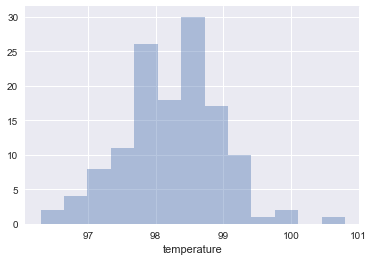

In [10]:
sns.distplot(df['temperature'],kde=False)

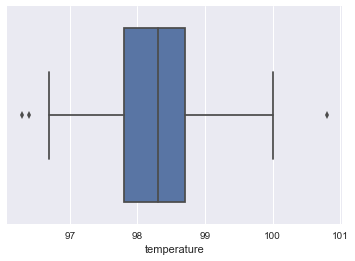

In [11]:
sns.boxplot(x='temperature',data=df)

The data looks fairly symmertric. To confirm this, lets construct a normal probability plot

In [12]:
from scipy import stats

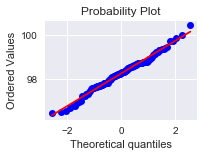

In [16]:
ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=df['temperature'].mean(), scale=df['temperature'].std(), size=len(df))
res = stats.probplot(x, plot=plt)

the temperature appears normal

# Is the true population mean really 98.6 degrees F?

lets calculate the mean

In [18]:
mean=df['temperature'].mean()
mean

98.24923076923078

In [20]:
std=df['temperature'].std()
std

0.7331831580389454

In [22]:
n=len(df['temperature'])
n

130

In [28]:
SE = std / n ** 0.5

In [29]:
SE

0.06430441683789101

Lets use Z test since n>100
H0= Null hypothesis=98.6
Ha= alternate hypothesis !=98.6


In [30]:
z=(mean-98.6)/SE
z

-5.454823292364079

Lets calcualate p value now on 2 tail test

In [32]:
p = stats.norm.sf(abs(z))*2
p

4.9021570141133797e-08

since p is much less than signiface value(0.05), we can reject H0 that the mean temperature is 98.6 deg. F.

# At what temperature should we consider someone's temperature to be "abnormal"?

lets compute the margin of error and 95% confidence interval for the sample distribution.

In [34]:
ME=1.96*SE
ME

0.12603665700226638

In [37]:
CI=mean-ME,mean+ME
CI

(98.12319411222852, 98.37526742623304)

We can be 95% certain that the mean body temperature should be between 98.1 and 98.4 degrees F. Mean temperatures outside this range would be considered abnormal.

Is there a significant difference between males and females in normal temperature?

Use a two-sample hypothesis test to determine if a statistically-significant different in normal temperatures occurs between males and females:
H0 (null) = mean_males - mean_females == 0
HA (alternative) = mean_males - mean_females != 0
Since the direction of the difference is unimportant, use a two-sided hypothesis test.

In [38]:
meanMale=df[df.gender=='M'].temperature.mean()
varMale=df[df.gender=='M'].temperature.var()
meanFemale=df[df.gender=='F'].temperature.mean()
varFemale=df[df.gender=='F'].temperature.var()
SE=((varMale/len(df[df.gender=='M'])+varFemale/len(df[df.gender=='F'])))**0.5

In [39]:
zScore=(meanMale-meanFemale)/SE# using z score because sample size > 30
p_value = stats.norm.sf(abs(zScore))*2# using two-sided test
p_value

0.02228736076067726

since p value is less than .05, we can reject null hypothesis